In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings(action='ignore')


!python -V
print(sklearn.__version__)

Python 3.8.8
1.0.2


In [3]:
df = pd.read_csv('selected_route_18.csv', sep=',')
df.dropna(axis=0, how='any', inplace=True)

df

,osm_id,date_time,link_dir,speed_kmph,n_time,hours,mins,n_day,stores,n_month,highway,road_lt_m,bus_stop
0,14904476,2018-01-01 00:00:00,1,33,00:00,0,0,MONDAY,CLOSED,JANUARY,primary,96,no
1,174486699,2018-01-01 00:00:00,1,26,00:00,0,0,MONDAY,CLOSED,JANUARY,primary,146,no
2,302472924,2018-01-01 00:00:00,1,28,00:00,0,0,MONDAY,CLOSED,JANUARY,primary,88,no
3,14904476,2018-01-01 00:15:00,1,20,00:15,0,15,MONDAY,CLOSED,JANUARY,primary,96,no
4,35355049,2018-01-01 00:15:00,1,41,00:15,0,15,MONDAY,CLOSED,JANUARY,primary,165,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218284,14904476,2019-01-01 00:00:00,1,35,00:00,0,0,TUESDAY,CLOSED,JANUARY,primary,96,no
218285,112282656,2019-01-01 00:00:00,1,41,00:00,0,0,TUESDAY,CLOSED,JANUARY,primary,398,yes
218286,174486699,2019-01-01 00:00:00,1,27,00:00,0,0,TUESDAY,CLOSED,JANUARY,primary,146,no
218287,442167476,2019-01-01 00:00:00,1,31,00:00,0,0,TUESDAY,CLOSED,JANUARY,primary,107,no


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218289 entries, 0 to 218288
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   osm_id      218289 non-null  int64 
 1   date_time   218289 non-null  object
 2   link_dir    218289 non-null  int64 
 3   speed_kmph  218289 non-null  int64 
 4   n_time      218289 non-null  object
 5   hours       218289 non-null  int64 
 6   mins        218289 non-null  int64 
 7   n_day       218289 non-null  object
 8   stores      218289 non-null  object
 9   n_month     218289 non-null  object
 10  highway     218289 non-null  object
 11  road_lt_m   218289 non-null  int64 
 12  bus_stop    218289 non-null  object
dtypes: int64(6), object(7)
memory usage: 21.7+ MB


,osm_id,link_dir,speed_kmph,hours,mins,road_lt_m
count,2.182890e+05,218289.0,218289.000000,218289.000000,218289.000000,218289.000000
mean,1.675323e+08,1.0,27.080421,11.707214,22.501890,156.492045
std,1.398803e+08,0.0,8.890819,6.915418,16.781208,107.584584
min,1.490448e+07,1.0,1.000000,0.000000,0.000000,61.000000
25%,3.535505e+07,1.0,21.000000,6.000000,0.000000,88.000000
50%,1.133421e+08,1.0,27.000000,12.000000,30.000000,107.000000
75%,3.024729e+08,1.0,33.000000,18.000000,45.000000,165.000000
max,4.421675e+08,1.0,114.000000,23.000000,45.000000,398.000000


In [5]:
df['osm_id'].value_counts()

112282656    33414
35355049     33247
174486699    33067
302472924    32067
14904476     31965
442167476    28943
113342145    25586
Name: osm_id, dtype: int64

# Preprocessing 

In [13]:
# import label encoder to convert categorical data into numerical value
from sklearn.preprocessing import LabelEncoder

def preprocess_inputs(df):
    df = df.copy()

    # Split df into X and y
    # selecting the prediction target (label)
    y = df.speed_kmph
    
    # convert all the features with label encoder
    df['n_time_n'] = LabelEncoder().fit_transform(df['n_time'])
    df['n_day_n'] = LabelEncoder().fit_transform(df['n_day'])
    df['n_month_n'] = LabelEncoder().fit_transform(df['n_month'])
    df['stores_n'] = LabelEncoder().fit_transform(df['stores'])
    df['highway_n'] = LabelEncoder().fit_transform(df['highway'])
    df['bus_stop_n'] = LabelEncoder().fit_transform(df['bus_stop'])

    # selecting the 'features'
    data_features = ['osm_id', 'hours', 'mins', 'n_day_n', 'n_month_n', 'stores_n','road_lt_m', 'bus_stop_n']
    X = df[data_features]

    # data_features = ['osm_id', 'hours', 'mins', 'n_day_n', 'n_month_n', 'stores_n', 'road_lt_m']
    # data_features = ['hours', 'mins', 'n_day_n', 'n_month_n', 'stores_n']

    X.sample(n=5)

    # Visualizing Correlation
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, vmin=-1.0, cmap='mako')
    plt.show()

    # Inspect the data
    print('DATA INSPECTION RESULTS:')
    # print('time values:', df['n_time'].unique())
    # print('day values:', df['n_day'].unique())
    # print('month values:', df['n_month'].unique())
    # print('stores values:', df['stores'].unique())
    # print('bus_stop values:', df['bus_stop'].unique())
    # print('\n')
    # print('time values:', df['n_time_n'].unique())
    # print('day values:', df['n_day_n'].unique())
    # print('month values:', df['n_month_n'].unique())
    # print('stores values:', df['stores_n'].unique())
    # print('bus_stop values:', df['bus_stop_n'].unique())
    # print('link_dir values:', df['link_dir'].unique())
    # print('highway values:', df['highway'].unique())
    # print('\n')

    # Train-test split
    train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.7, shuffle=False, random_state=1)

    # Scale X
    print('Variance before scaler:', train_X.var(), sep='\n')
    print('\n')
    scaler = StandardScaler()
    scaler.fit(train_X)
    train_X = pd.DataFrame(scaler.transform(train_X), index=train_X.index, columns=train_X.columns)
    val_X = pd.DataFrame(scaler.transform(val_X), index=val_X.index, columns=val_X.columns)

    print('Variance after scaler:', train_X.var(), sep='\n')
    print('\n')

    print(train_X)
    print(val_X)

    return train_X, val_X, train_y, val_y

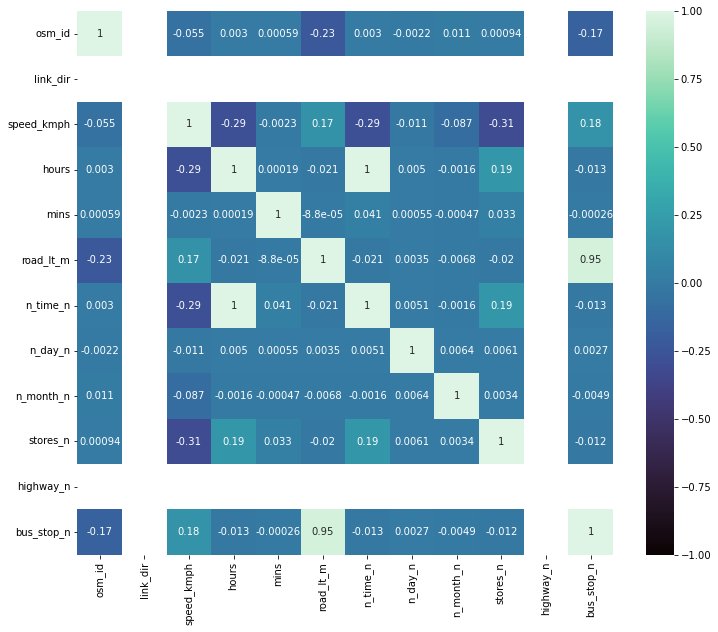

DATA INSPECTION RESULTS:
Variance before scaler:
osm_id        1.929929e+16
hours         4.783168e+01
mins          2.815786e+02
n_day_n       4.018732e+00
n_month_n     1.012323e+01
stores_n      1.115074e+00
road_lt_m     1.164300e+04
bus_stop_n    1.306943e-01
dtype: float64


Variance after scaler:
osm_id        1.000007
hours         1.000007
mins          1.000007
n_day_n       1.000007
n_month_n     1.000007
stores_n      1.000007
road_lt_m     1.000007
bus_stop_n    1.000007
dtype: float64


          osm_id     hours      mins   n_day_n  n_month_n  stores_n  \
0      -1.088978 -1.693419 -1.341441 -1.009413  -0.245917 -0.932342   
1       0.059745 -1.693419 -1.341441 -1.009413  -0.245917 -0.932342   
2       0.981030 -1.693419 -1.341441 -1.009413  -0.245917 -0.932342   
3      -1.088978 -1.693419 -0.447533 -1.009413  -0.245917 -0.932342   
4      -0.941768 -1.693419 -0.447533 -1.009413  -0.245917 -0.932342   
...          ...       ...       ...       ...        ...       ... 

In [14]:
train_X, val_X, train_y, val_y = preprocess_inputs(df)

# Training/Model Selection

In [8]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(train_X, train_y)
    print(name + " trained.")

                     Linear Regression trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


# Results

Ref: https://www.kaggle.com/getting-started/27261
Every estimator or model in Scikit-learn has a score method after being trained on the data, usually X_train, y_train.

When you call score on classifiers like LogisticRegression, RandomForestClassifier, etc. the method computes the accuracy score by default (accuracy is #correct_preds / #all_preds). By default, the score method does not need the actual predictions.

##### Score method of regressors
When score is called on regressors, the coefficient of determination - R2 is calculated by default. As in classifiers, the score method is simply a shorthand to calculate R2 since it is commonly used to assess the performance of a regressor.

More on model evaluation: https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn

In [9]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(val_X, val_y)))
    print(name + " R^2 Score: {:.5f}".format(model.score(train_X, train_y)))

                     Linear Regression R^2 Score: 0.12891
                     Linear Regression R^2 Score: 0.17919
                   K-Nearest Neighbors R^2 Score: 0.12197
                   K-Nearest Neighbors R^2 Score: 0.45059
                        Neural Network R^2 Score: 0.24841
                        Neural Network R^2 Score: 0.29119
Support Vector Machine (Linear Kernel) R^2 Score: 0.13035
Support Vector Machine (Linear Kernel) R^2 Score: 0.17858
   Support Vector Machine (RBF Kernel) R^2 Score: 0.21072
   Support Vector Machine (RBF Kernel) R^2 Score: 0.26576
                         Decision Tree R^2 Score: -0.02653
                         Decision Tree R^2 Score: 0.51333
                         Random Forest R^2 Score: 0.01186
                         Random Forest R^2 Score: 0.50919
                     Gradient Boosting R^2 Score: 0.21112
                     Gradient Boosting R^2 Score: 0.28694


In [13]:
results = """
                     Linear Regression R^2 Score: 0.10552
                     Linear Regression R^2 Score: 0.12040
                   K-Nearest Neighbors R^2 Score: 0.33469
                   K-Nearest Neighbors R^2 Score: 0.56296
                        Neural Network R^2 Score: 0.39353
                        Neural Network R^2 Score: 0.41942
Support Vector Machine (Linear Kernel) R^2 Score: 0.10186
Support Vector Machine (Linear Kernel) R^2 Score: 0.11775
   Support Vector Machine (RBF Kernel) R^2 Score: 0.30791
   Support Vector Machine (RBF Kernel) R^2 Score: 0.33896
                         Decision Tree R^2 Score: 0.16801
                         Decision Tree R^2 Score: 0.65624
                         Random Forest R^2 Score: 0.27439
                         Random Forest R^2 Score: 0.64952
                     Gradient Boosting R^2 Score: 0.38747
                     Gradient Boosting R^2 Score: 0.40612
"""
print('Results with bus_stop feature: ', results)

Results with bus_stop feature:  
                     Linear Regression R^2 Score: 0.10552
                     Linear Regression R^2 Score: 0.12040
                   K-Nearest Neighbors R^2 Score: 0.33469
                   K-Nearest Neighbors R^2 Score: 0.56296
                        Neural Network R^2 Score: 0.39353
                        Neural Network R^2 Score: 0.41942
Support Vector Machine (Linear Kernel) R^2 Score: 0.10186
Support Vector Machine (Linear Kernel) R^2 Score: 0.11775
   Support Vector Machine (RBF Kernel) R^2 Score: 0.30791
   Support Vector Machine (RBF Kernel) R^2 Score: 0.33896
                         Decision Tree R^2 Score: 0.16801
                         Decision Tree R^2 Score: 0.65624
                         Random Forest R^2 Score: 0.27439
                         Random Forest R^2 Score: 0.64952
                     Gradient Boosting R^2 Score: 0.38747
                     Gradient Boosting R^2 Score: 0.40612



In [17]:
results = """
                     Linear Regression R^2 Score: 0.10938
                   K-Nearest Neighbors R^2 Score: 0.33238
                        Neural Network R^2 Score: -14.07604
Support Vector Machine (Linear Kernel) R^2 Score: -6.82171
   Support Vector Machine (RBF Kernel) R^2 Score: 0.04857
                         Decision Tree R^2 Score: 0.15332
                         Random Forest R^2 Score: 0.26139
                     Gradient Boosting R^2 Score: 0.38760
"""
print('Results before scalling: ', results)

Results before scalling:  
                     Linear Regression R^2 Score: 0.10938
                   K-Nearest Neighbors R^2 Score: 0.33238
                        Neural Network R^2 Score: -14.07604
Support Vector Machine (Linear Kernel) R^2 Score: -6.82171
   Support Vector Machine (RBF Kernel) R^2 Score: 0.04857
                         Decision Tree R^2 Score: 0.15332
                         Random Forest R^2 Score: 0.26139
                     Gradient Boosting R^2 Score: 0.38760



An alternative way to obtain r squared value

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

for name, model in models.items():
    val_predict = model.predict(val_X)
    print(name + " R^2 Score: {:.5f}".format(r2_score(val_y, val_predict)))
    print(name + " RMSE: {:.5f}".format(np.sqrt(mean_squared_error(val_y, val_predict))))
    print(name + " MAE: {:.5f}".format(mean_absolute_error(val_y, val_predict)))

                     Linear Regression R^2 Score: 0.12891
                     Linear Regression RMSE: 8.23066
                     Linear Regression MAE: 6.48045
                   K-Nearest Neighbors R^2 Score: 0.12197
                   K-Nearest Neighbors RMSE: 8.26341
                   K-Nearest Neighbors MAE: 6.32391
                        Neural Network R^2 Score: 0.24841
                        Neural Network RMSE: 7.64528
                        Neural Network MAE: 5.87858
Support Vector Machine (Linear Kernel) R^2 Score: 0.13035
Support Vector Machine (Linear Kernel) RMSE: 8.22384
Support Vector Machine (Linear Kernel) MAE: 6.46726
   Support Vector Machine (RBF Kernel) R^2 Score: 0.21072
   Support Vector Machine (RBF Kernel) RMSE: 7.83463
   Support Vector Machine (RBF Kernel) MAE: 6.04579
                         Decision Tree R^2 Score: -0.02653
                         Decision Tree RMSE: 8.93489
                         Decision Tree MAE: 6.81343
                     